In [1]:
import pandas as pd

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os, sys
parent_dir = os.path.abspath('..')
# the parent_dir could already be there if the kernel was not restarted,
# and we run this cell again
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

In [4]:
from mirror.ground import Ground

In [5]:
path_ground = "./sample_ground.csv"

In [6]:
df_ground = pd.read_csv(filepath_or_buffer=path_ground, header=0)

In [17]:
df_ground.head()

,ID1,ID2,Country,City,Street
0,e2c42733-ebdf-4503-80a6-274dddc161d4,c77b17ae-1e16-4acd-b50a-65839594c516,Lithuania,Atlanta,Timber Drive
1,e51b7339-9a6c-4f21-96f8-4813ae864685,fb138322-3e77-42c2-8c9f-e4bfb517cbeb,Barbados,Lyon,Bloomsbury Vale
2,476bf72d-4b2f-426b-a83e-533df76b7e8a,ea12cf43-962e-492d-975b-a26d5cf8311e,Turkmenistan,Oklahoma City,Fawn Drive
3,42143bfe-36b8-4abd-b784-ed78e0b46852,d3df3757-81d3-4b2a-afb5-972150800fc1,Spain,Fayetteville,Champion Hill
4,01b6e65c-8dd7-4ff2-b40a-f8ccc1a8a08b,3606d03d-69e1-430f-972d-cd8f40c345c3,Micronesia,Berlin,Birkbeck Avenue


In [8]:
ground = Ground(ground=df_ground, keys=["ID1", "ID2"])

In [9]:
path_mirror = "./sample_mirror.csv"
df_mirror = pd.read_csv(filepath_or_buffer=path_mirror, header=0)

In [10]:
from mirror.mirror import Mirror

In [11]:
mirror_01 = Mirror(ground, mirror=df_mirror)

In [18]:
mirror_01.raw_map.head()

,ID1,ID2,_mean,_merge,Country_ground,Country_mirror,Country,City_ground,City_mirror,City,Street_ground,Street_mirror,Street
0,e2c42733-ebdf-4503-80a6-274dddc161d4,c77b17ae-1e16-4acd-b50a-65839594c516,1.0,both,Lithuania,Lithuania,1,Atlanta,Atlanta,1,Timber Drive,Timber Drive,1
1,e51b7339-9a6c-4f21-96f8-4813ae864685,fb138322-3e77-42c2-8c9f-e4bfb517cbeb,1.0,both,Barbados,Barbados,1,Lyon,Lyon,1,Bloomsbury Vale,Bloomsbury Vale,1
2,476bf72d-4b2f-426b-a83e-533df76b7e8a,ea12cf43-962e-492d-975b-a26d5cf8311e,1.0,both,Turkmenistan,Turkmenistan,1,Oklahoma City,Oklahoma City,1,Fawn Drive,Fawn Drive,1
3,42143bfe-36b8-4abd-b784-ed78e0b46852,d3df3757-81d3-4b2a-afb5-972150800fc1,1.0,both,Spain,Spain,1,Fayetteville,Fayetteville,1,Champion Hill,Champion Hill,1
4,01b6e65c-8dd7-4ff2-b40a-f8ccc1a8a08b,3606d03d-69e1-430f-972d-cd8f40c345c3,1.0,both,Micronesia,Micronesia,1,Berlin,Berlin,1,Birkbeck Avenue,Birkbeck Avenue,1


In [13]:
mirror_01.stats

{'volume': {'ground': 500, 'mirror': 500},
 'key_matching': {'matched': 500,
  'unmatched_ground': 0,
  'unmatched_mirror': 0},
 'field_assertivity': {'Country': 99.4, 'City': 99.8, 'Street': 100.0}}

In [14]:
mirror_01.print_stats()

VOLUMETRY:
	|- Ground truth: 500
	|- Mirror: 500

KEY MATCHING:
	|- Matched keys: 500 (100%)
	|- Unmatched keys (ground): 0 (0%)
	|- Unmatched keys (mirror): 0 (0%)

FIELD ASSERTIVITY: abs
	|- Country: 99.4
	|- City: 99.8
	|- Street: 100.0


In [28]:
mirror_01.inspect_divergence_on_field("Country")

,ID1,ID2,Country_ground,Country_mirror,Country
11,7a9ed2bb-0709-40d0-be37-e8213b84f493,9bbfd181-0613-4b0a-95c4-db14b1f253ed,Dominican Republic,Dominican Repub,0
26,242146c4-5325-4401-bf79-9f9fccccfe92,126815a8-f7b6-4e05-a060-acb0788843ff,East Timor (Timor-Leste),East Tim (Timor-Le),0
47,4e7dcbe5-74fb-4780-b41b-b8e3597f3c40,17a94ffb-f6be-47d4-a9d4-d89be860bf47,The Gambia,The,0


In [16]:
import seaborn as sns

<AxesSubplot:>

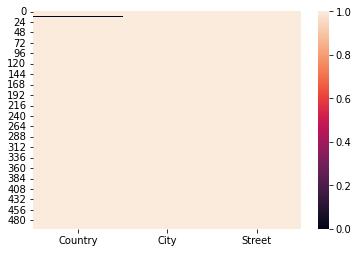

In [24]:
sns.heatmap(mirror_01.map[mirror_01.attributes])

In [23]:
mirror_01.map[mirror_01.attributes]

,Country,City,Street
0,1,1,1
1,1,1,1
2,1,1,1
3,1,1,1
4,1,1,1
...,...,...,...
495,1,1,1
496,1,1,1
497,1,1,1
498,1,1,1


In [29]:
Mirror?

Init signature: Mirror(ground, mirror: pandas.core.frame.DataFrame, score='abs')
Docstring:     
Mirror main class.

Parameters:
    |- ground: Ground object.
    |- mirror: Pandas Dataframe of the mirror dataset. Type: `pandas.DataFrame`
    |- score (optional, default `abs`): Scoring method for assertivity evaluation. The following methods are suported:
        a) "abs": binary comparison (0 for divergence, 1 for assertion)
        b) "sequence-matcher":  implementation of `difflib.SequenceMatcher` algorithm
File:           ~/.dev/mirror/mirror/mirror.py
Type:           type
Subclasses:     
